In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split, cross_val_score

iris = load_iris()

X = iris.data
y = iris.target


In [21]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
model = LogisticRegression(penalty = 'l1')
model.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
model.coef_


array([[ 0.        ,  2.53483359, -2.84080453,  0.        ],
       [ 0.32044673, -1.77555468,  0.66082212, -1.53432368],
       [-2.62250444, -2.50821931,  3.26111978,  4.61822521]])

In [49]:
coeffs = pd.DataFrame(model.coef_, columns = iris.feature_names, index =iris.target_names)
coeffs


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.000000,2.534834,-2.840805,0.000000
versicolor,0.320447,-1.775555,0.660822,-1.534324
virginica,-2.622504,-2.508219,3.261120,4.618225


In [50]:
from sklearn.preprocessing import StandardScaler
X_norm =  StandardScaler().fit_transform(X)

model.fit(X_norm, y)

coeffs = pd.DataFrame(model.coef_, columns = iris.feature_names, index =iris.target_names)
coeffs


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.000000,1.198059,-4.397338,-0.031815
versicolor,0.029665,-1.239800,0.762224,-0.769246
virginica,0.000000,-0.480911,2.715689,4.581506


In [51]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
cross_val_score(model, X, y, cv=3).mean()

0.93995098039215685

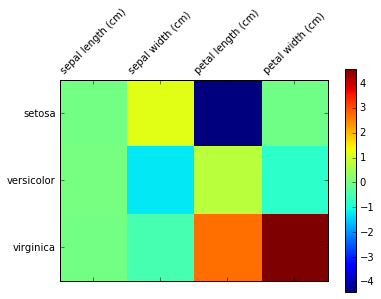

In [64]:
# first import matplotlib
% matplotlib inline
import matplotlib.pyplot as plt

# then create a figure and a plot
fig = plt.figure()
ax = fig.add_subplot(111)
fig.colorbar(cax)
# display the matrix
cax = ax.matshow(coeffs)

ax.set_xticklabels(['']+list(coeffs.columns), rotation=45);
ax.set_yticklabels(['']+list(coeffs.index));
